In [107]:
#supervised learning work


In [127]:
#import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn import neighbors, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [129]:
n = pd.read_csv(r'data\\Normal.csv')
h = pd.read_csv(r'data\\Type_H.csv')
s= pd.read_csv(r'data\\Type_S.csv')

In [131]:
print("Duplicate labels found in dataset:")
print(n.Class.unique(),h.Class.unique(),s.Class.unique())

Duplicate labels found in dataset:
['Normal' 'Nrmal'] ['Type_H' 'type_h'] ['Type_S' 'tp_s']


In [133]:
h['Class'] =h['Class'].str.replace('type_h','Type_H')
n['Class'] =n['Class'].str.replace('Nrmal','Normal')
s['Class'] =s['Class'].str.replace('tp_s','Type_S')
print("Adjusting dataset to have appropriate class:")
print(n.Class.unique(),h.Class.unique(),s.Class.unique())

Adjusting dataset to have appropriate class:
['Normal'] ['Type_H'] ['Type_S']


In [135]:
#reformatting for visualisation
h['Class'] =h['Class'].str.replace('Type_H','Type H')
s['Class'] =s['Class'].str.replace('Type_S','Type S')
print(n.Class.unique(),h.Class.unique(),s.Class.unique())

['Normal'] ['Type H'] ['Type S']


In [137]:
def cleansing (x):
    
    print("\033[1m HEAD\n\033[0m",x.head())
    print("\033[1m\nTAIL\n\033[0m",x.tail())
    print("\033[1m\nDATA TYPES\n\033[0m",s.dtypes)
    print("\033[1m\nDESCRIBE\n\033[0m",x.describe())
    print("\033[1m\nMissing value is:\033[0m",x.isnull().values.any())
    print("\033[1m\nDupicate value is:\033[0m",x.duplicated().values.any())
    print("\033[1m\nShape of Dataset:\033[0m",x.shape)
    print("\033[1m\nSize of Dataset:\033[0m",x.size)
    print("\033[1m\nDimension of Dataset:\033[0m",x.ndim)

In [139]:
def correlate(x):
    cl=x.Class.nunique()
    if cl>2:
        cls="Mixed"
    else:
        cls=x.Class[0] 
    print(f"\033[1m\nDiagonal Correlation Heat Map Type: {cls}\033[0m\n")
    corr = x.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    ax = sns.heatmap(
        corr,mask=mask, 
        vmin=-1,vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,linewidths=.5, cbar_kws={"shrink": .5})
   
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right');

In [141]:
def distribution(x):
    cl=x.Class.nunique()
    if cl>2:
        cls="Mixed"
    else:
        cls=x.Class[0]  
    
    print(f"\033[1m\nDistribution Observed In Dataset Type: {cls}\033[0m\n")
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(12,6));
    sns.histplot( x["P_incidence"] , color="skyblue", ax=ax1)
    ax1.set_title("Incidence");
    sns.histplot( x["P_tilt"] , color="dimgray", ax=ax2);
    ax2.set_title("Tilt");
    sns.histplot( x["L_angle"] , color="olive", ax=ax3);
    ax3.set_title("Angle");
    sns.histplot( x["S_slope"] , color="gold", ax=ax4);
    ax4.set_title("Slope");
    sns.histplot( x["P_radius"] , color="teal", ax=ax5);
    ax5.set_title("Radius");
    sns.histplot( x["S_Degree"] , color="seagreen", ax=ax6);
    ax6.set_title("Degree");
    
    plt.tight_layout();

In [143]:
cleansing(n)

 HEAD
    P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

TAIL
     P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
95    47.903565  13.616688  36.000000  34.286877  117.449062 -4.245395  Normal
96    53.936748  20.721496  29.220534  33.215251  114.365845 -0.421010  Normal
97    61.446597  22.694968  46.170347  38.751628  125.670725 -2.707880  Normal
98    45.252792   8.693157  41.583126  36.559635  118.545842  0.214750  Normal
99    33.841641   5.073991  36.641233  28.767649  123.945244 -0.199249  Normal

DATA TYPES
 P_incidence    float64
P_tilt  


Distribution Observed In Dataset Type: Normal



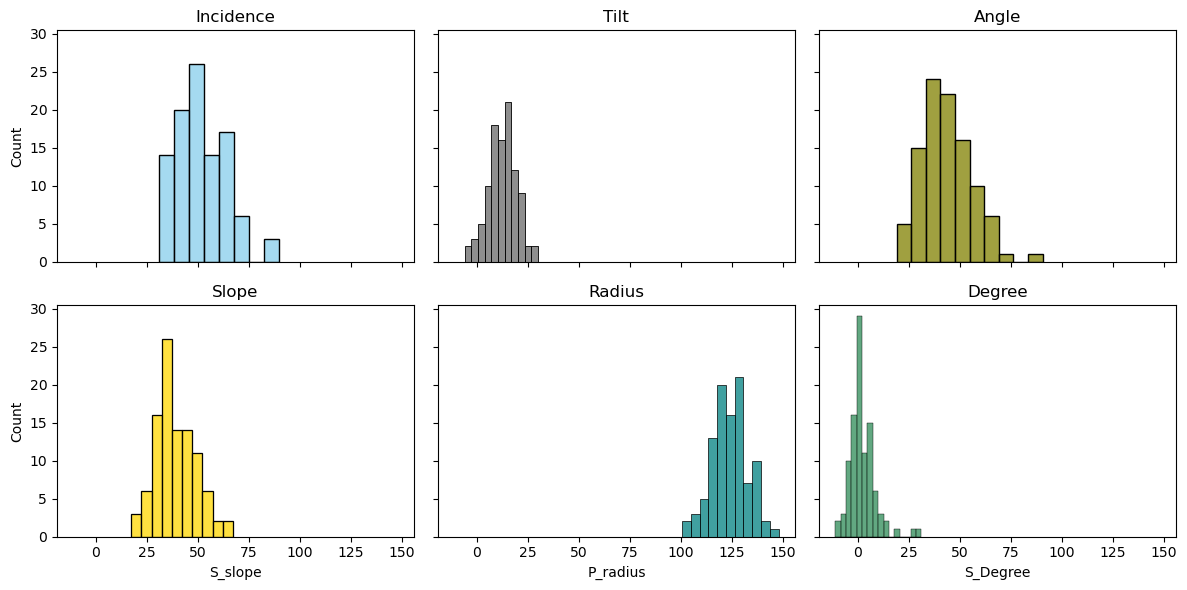

In [145]:
distribution(n)

In [147]:
correlate(n)


Diagonal Correlation Heat Map Type: Normal



ValueError: could not convert string to float: 'Normal'

In [149]:
cleansing(h)

 HEAD
    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400  Type H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type H

TAIL
     P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
55    47.657730  13.277385  36.679985  34.380345   98.249781  6.273012  Type H
56    43.349606   7.467469  28.065483  35.882137  112.776187  5.753277  Type H
57    46.855781  15.351514  38.000000  31.504267  116.250917  1.662706  Type H
58    43.203185  19.663146  35.000000  23.540039  124.846109 -2.919076  Type H
59    48.109236  14.930725  35.564683  33.178512  124.056452  7.947905  Type H

DATA TYPES
 P_incidence    float64
P_


Distribution Observed In Dataset Type: Type H



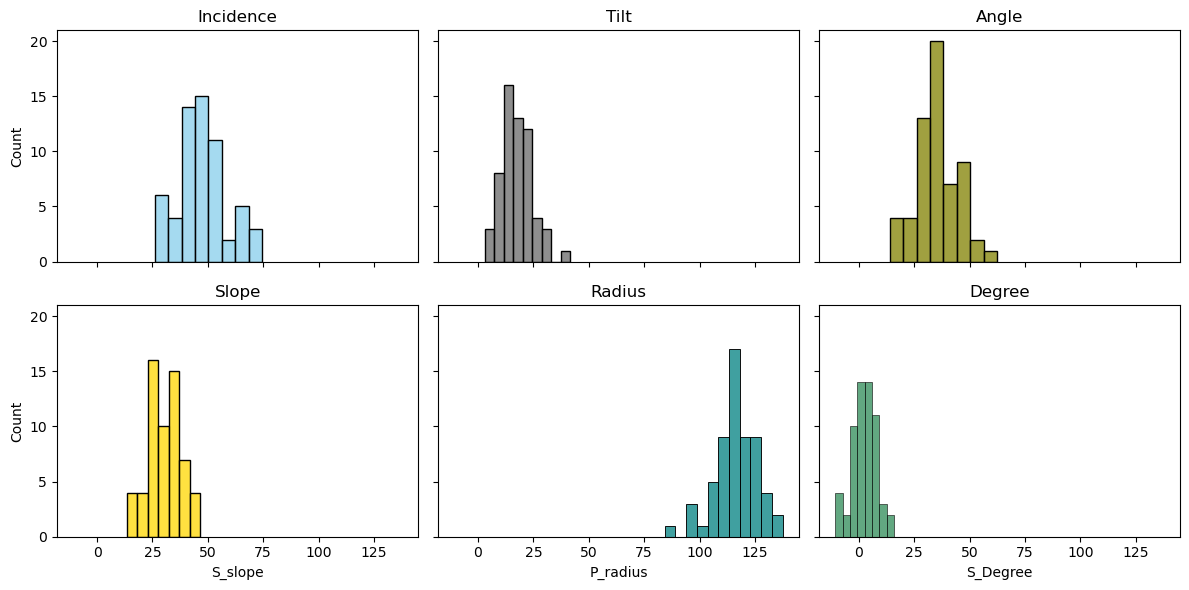

In [151]:
distribution(h)

In [153]:
correlate(h)


Diagonal Correlation Heat Map Type: Type H



ValueError: could not convert string to float: 'Type H'

In [155]:
cleansing(s)

 HEAD
    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type S

TAIL
      P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
145    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
146    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
147    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
148    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
149    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
145  Type S  
146  Type S  
147  Ty


Distribution Observed In Dataset Type: Type S



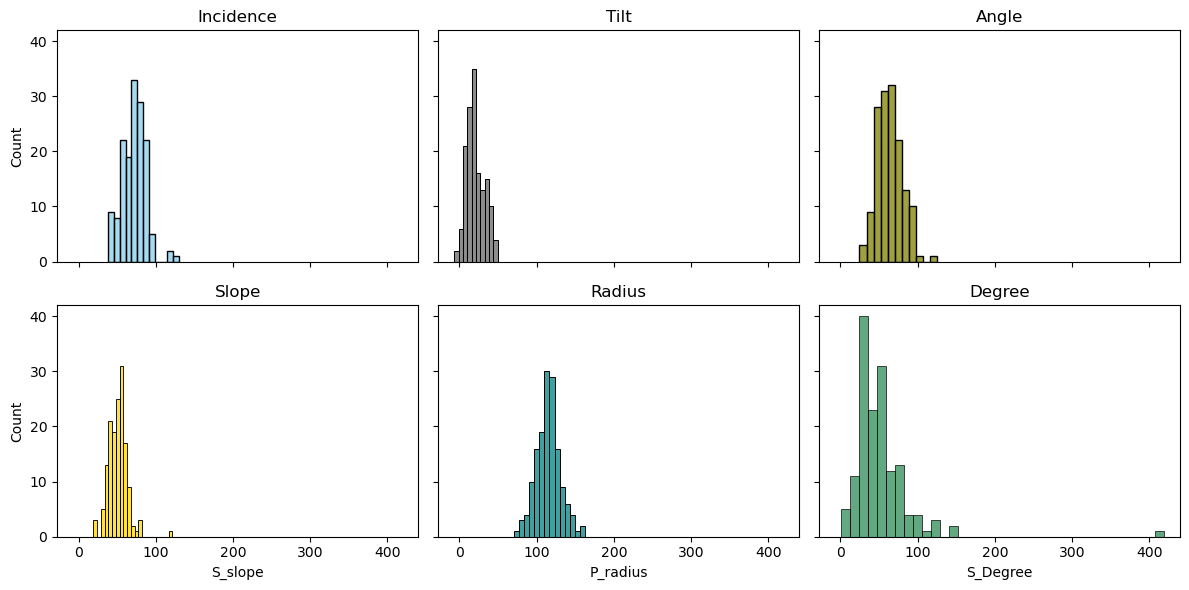

In [157]:
distribution(s)

In [159]:
correlate(s)


Diagonal Correlation Heat Map Type: Type S



ValueError: could not convert string to float: 'Type S'

In [161]:
c = pd.concat(([n,h,s]), ignore_index=True)
c

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type S


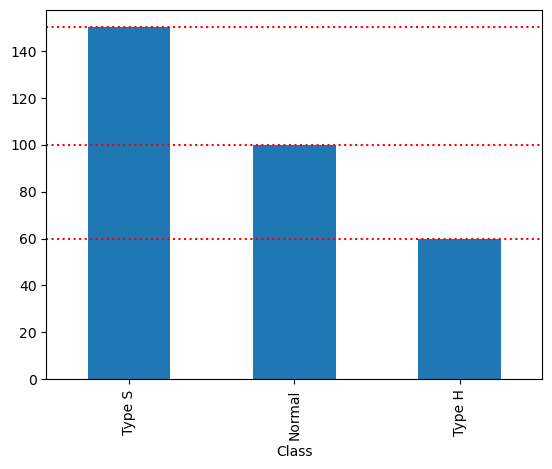

In [163]:
c.Class.value_counts().plot(kind = 'bar');
plt.axhline(y=(n.Class.count()), color='r', linestyle='dotted');
plt.axhline(y=(h.Class.count()), color='r', linestyle='dotted');
plt.axhline(y=(s.Class.count()), color='r', linestyle='dotted');

In [165]:
cleansing(c)

 HEAD
    P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

TAIL
      P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
305    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
306    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
307    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
308    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
309    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
305  Type S  
306  Type S  
307  Type S  


Distribution Observed In Dataset Type: Mixed



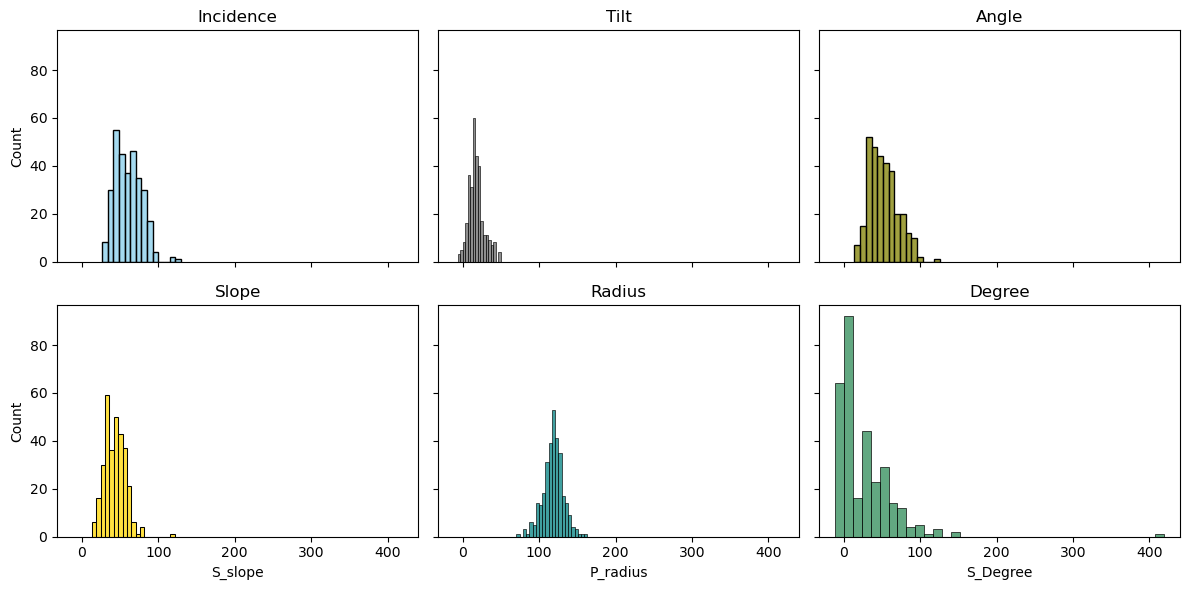

In [167]:
distribution(c)

In [169]:
correlate(c)


Diagonal Correlation Heat Map Type: Mixed



ValueError: could not convert string to float: 'Normal'

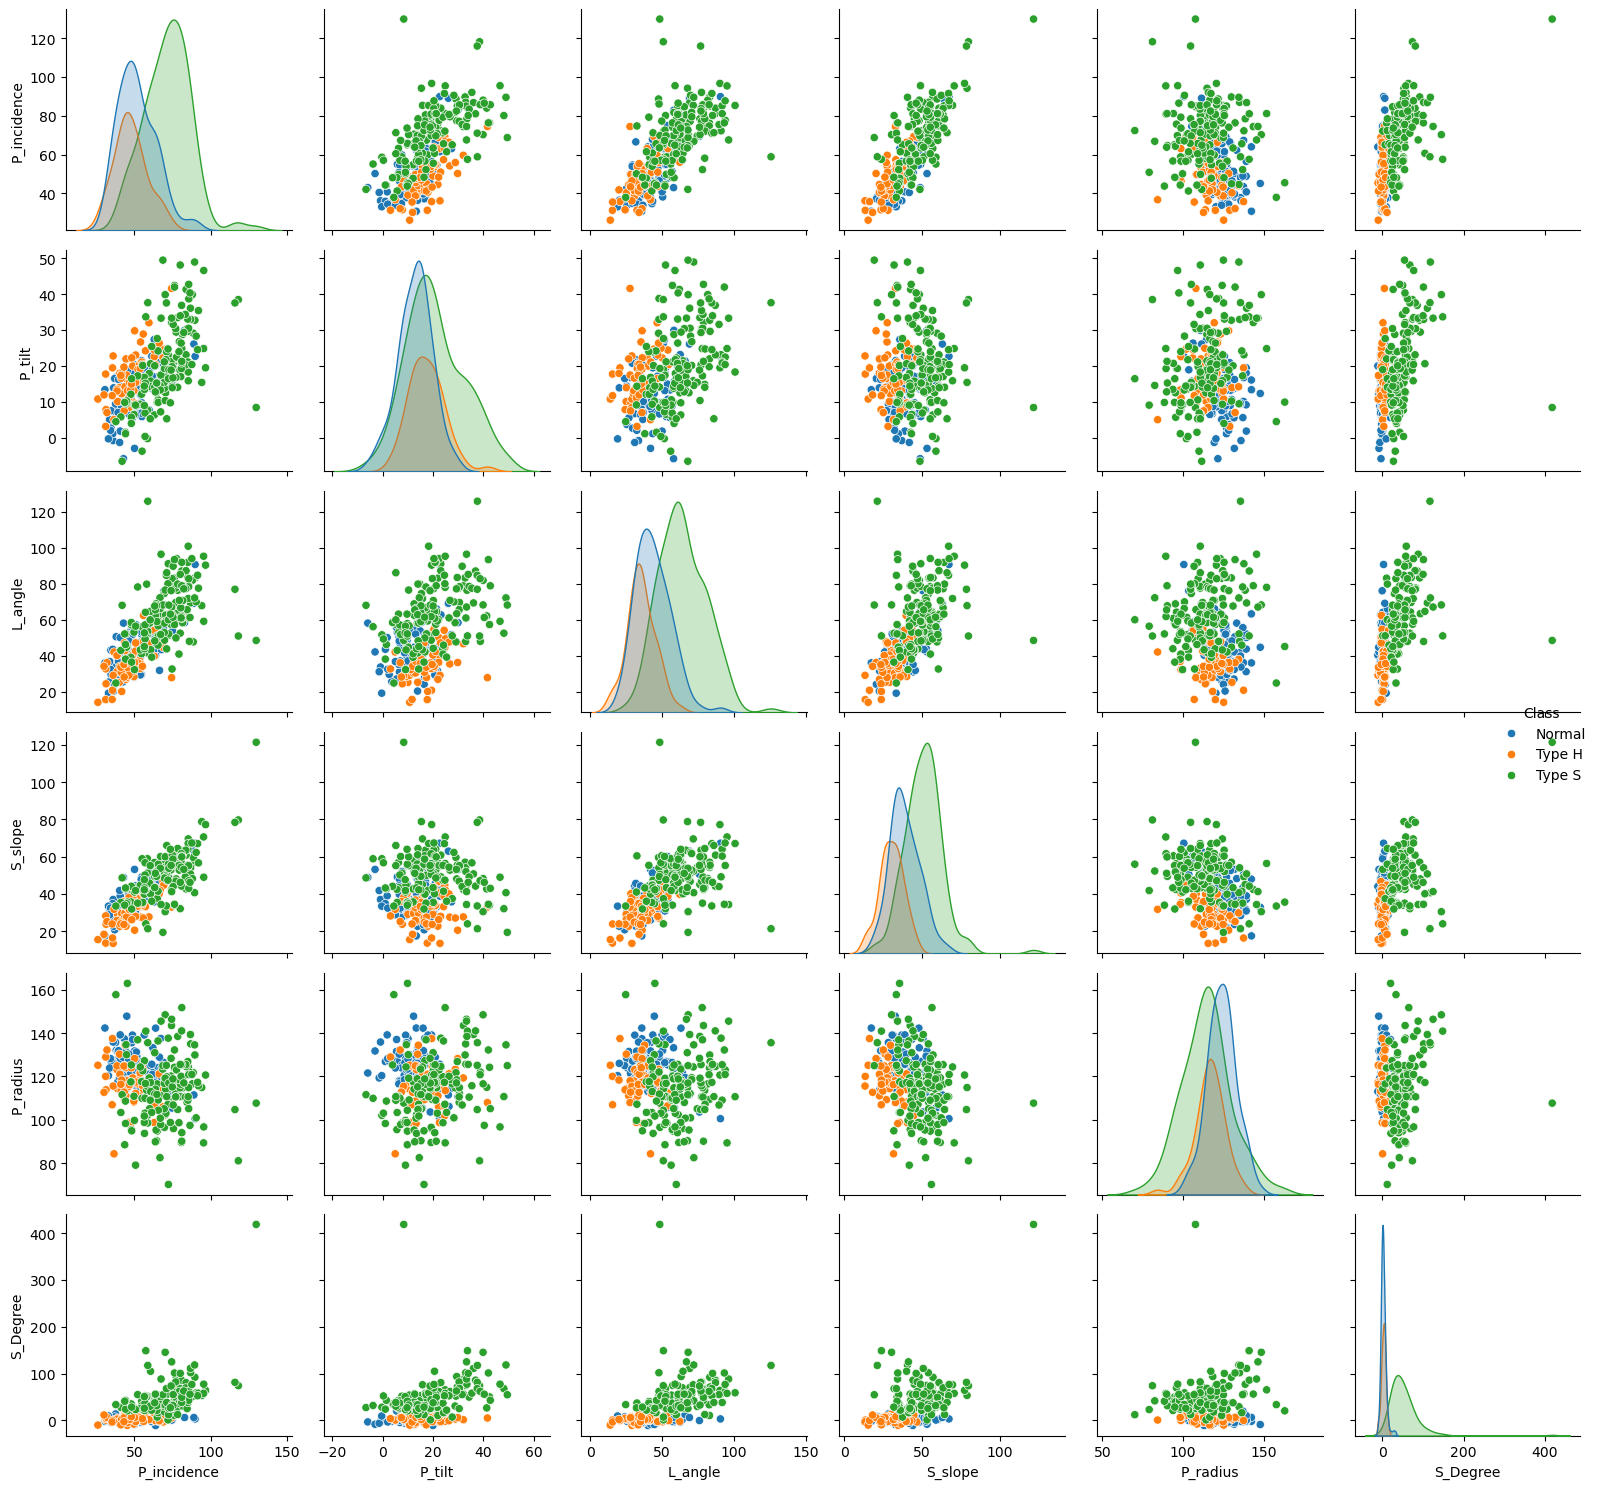

In [171]:
sns.pairplot(c,hue="Class")
plt.tight_layout();

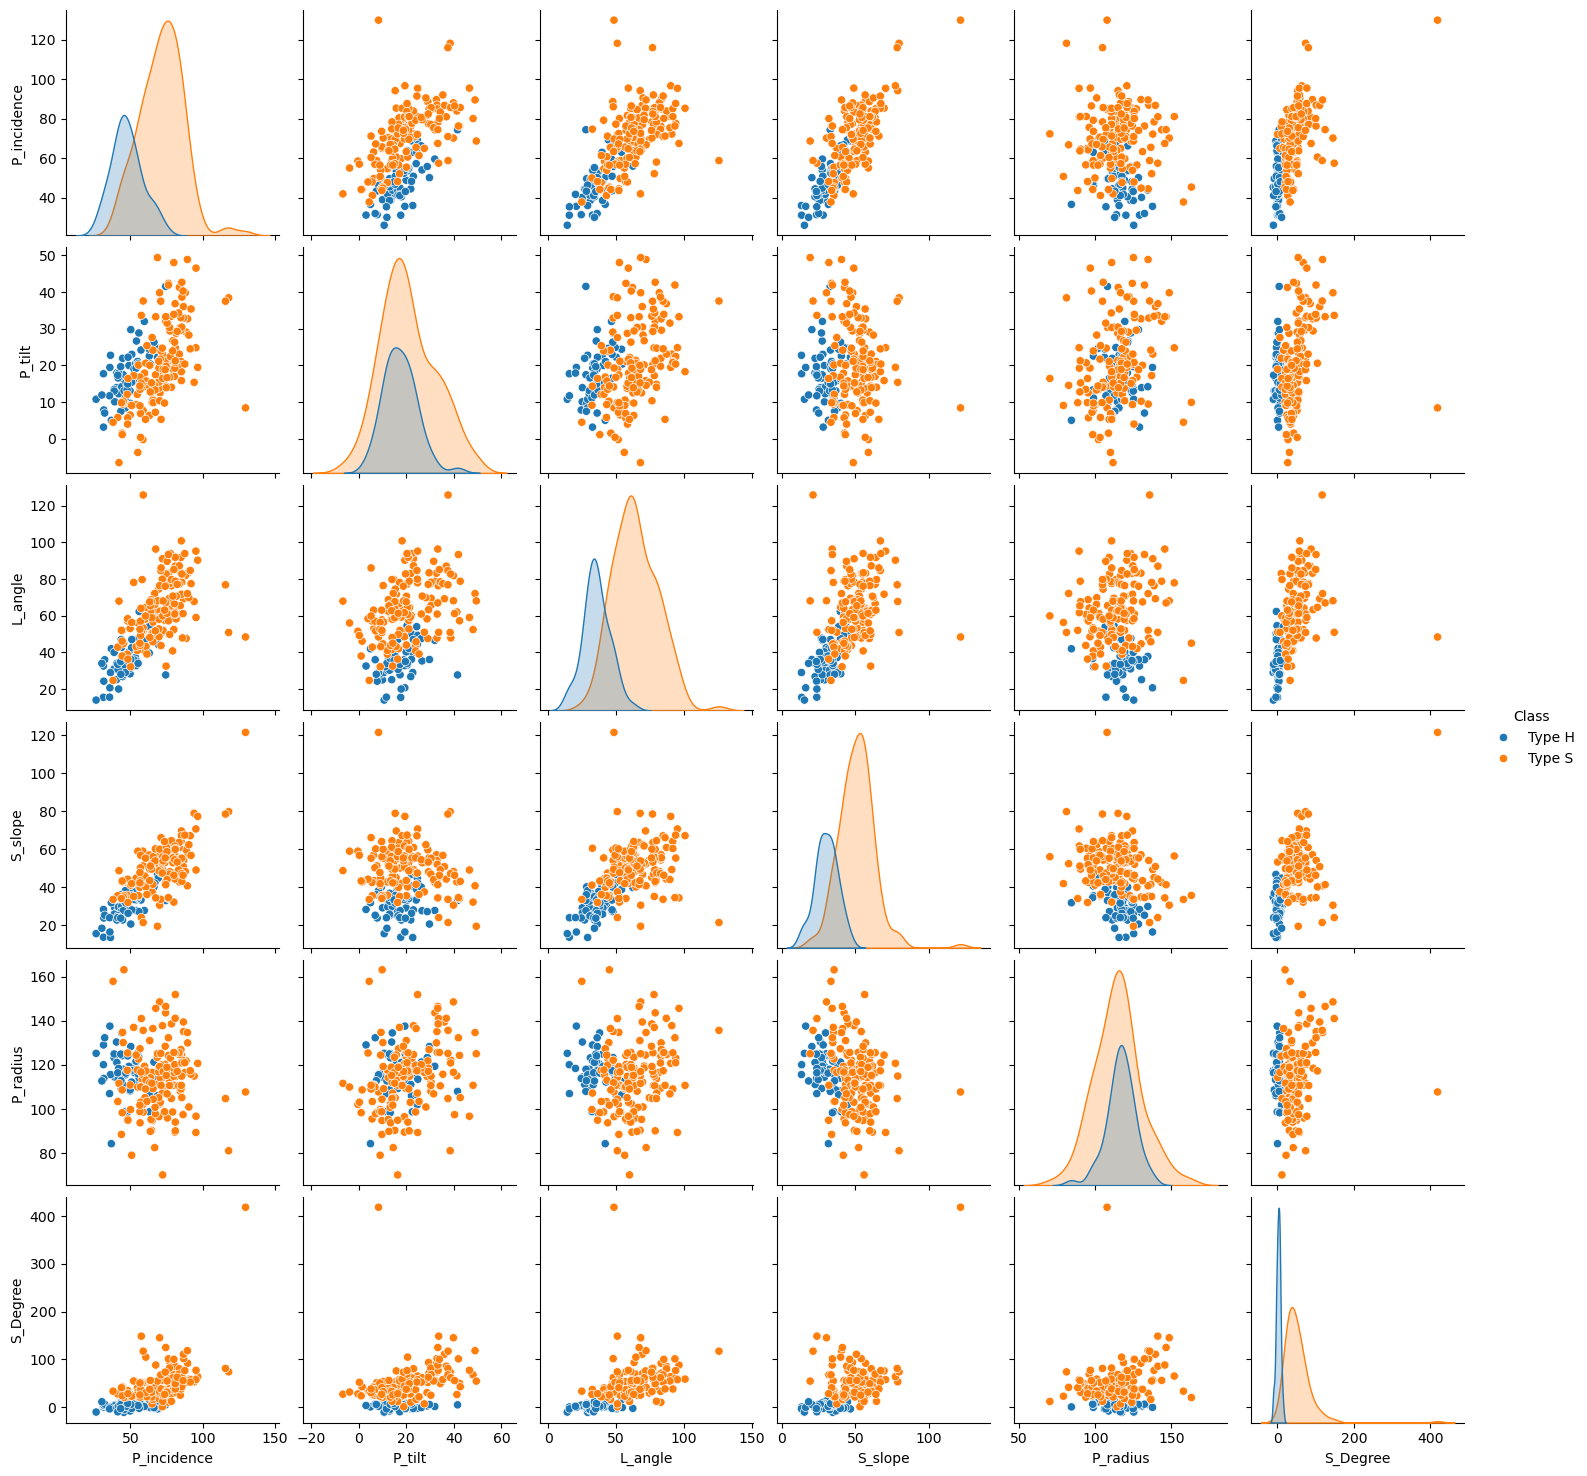

In [173]:
hs = pd.concat(([h,s]), ignore_index=True)
sns.pairplot(hs,hue="Class");

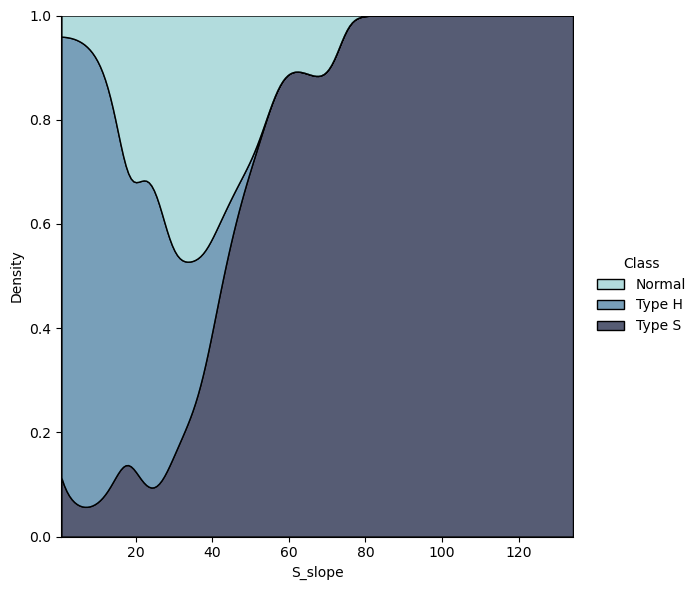

In [175]:
sns.displot(data=c,x="S_slope", hue="Class",kind="kde", height=6,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");

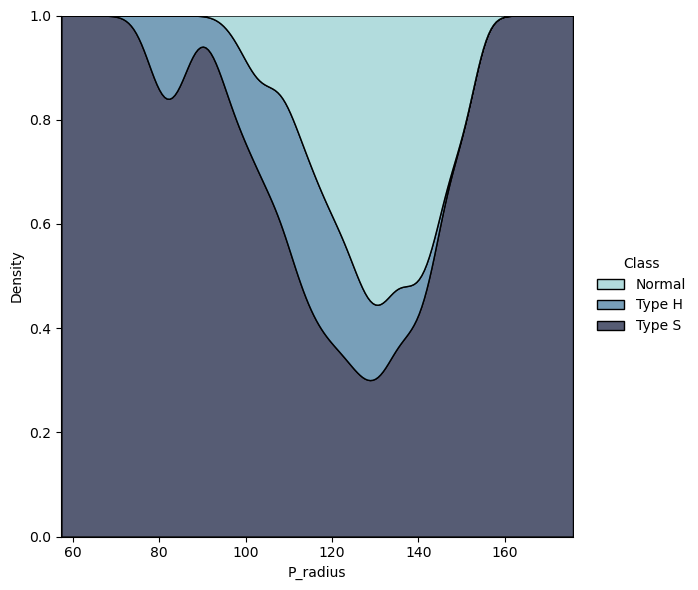

In [177]:
sns.displot(data=c,x="P_radius", hue="Class",kind="kde", height=6,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");

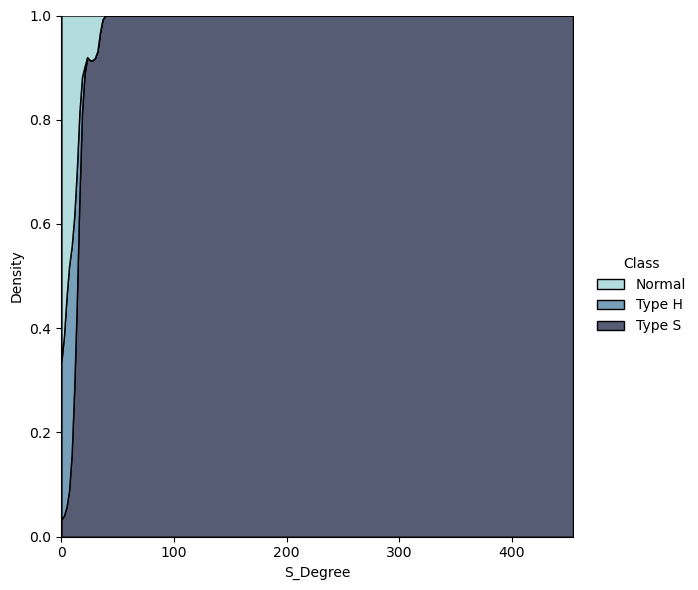

In [179]:
sns.displot(data=c,x="S_Degree", hue="Class",kind="kde", height=6,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");

ConversionError: Failed to convert value(s) to axis units: [[418.5430821], [418.5430821]]

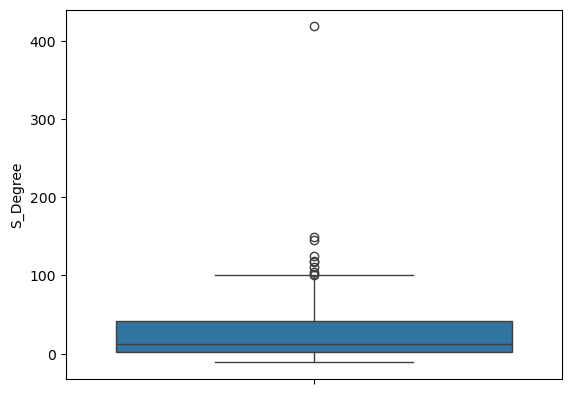

In [181]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16}
sns.boxplot(c["S_Degree"]);
out=int(c["S_Degree"].max())
plt.axvline(x=([c["S_Degree"].max()]), color='r', linestyle='dotted');
plt.text(out,.6, out,fontdict=font );

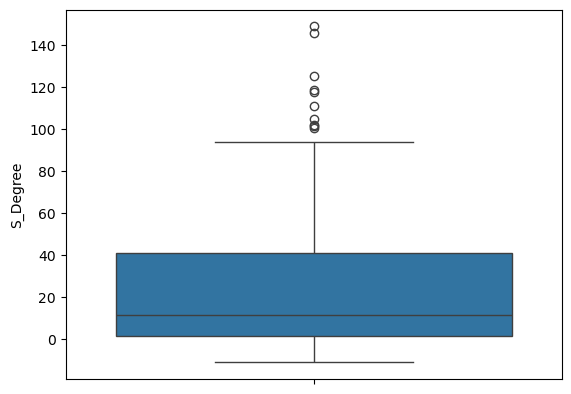

In [183]:
q = c["S_Degree"].max()
c1=c[c["S_Degree"] < q]
sns.boxplot(c1["S_Degree"]);

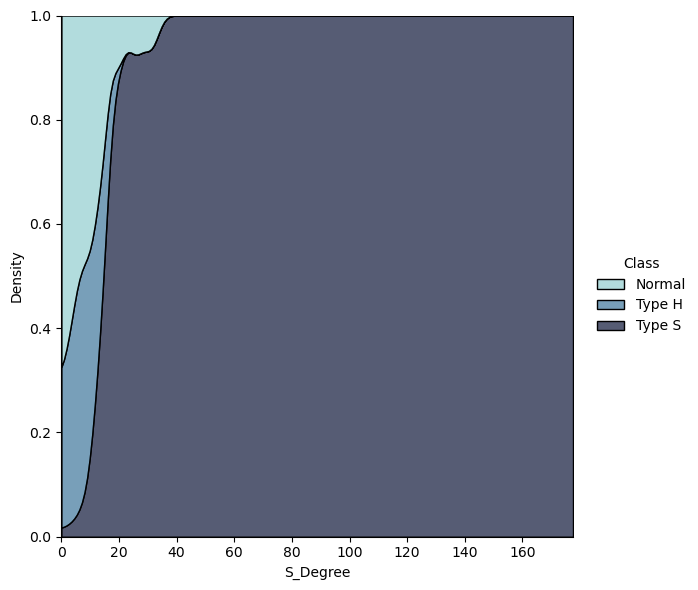

In [185]:
sns.displot(data=c1,x="S_Degree", hue="Class",kind="kde", height=6,multiple="fill", clip=(0, None),
            palette="ch:rot=-.25,hue=1,light=.75");

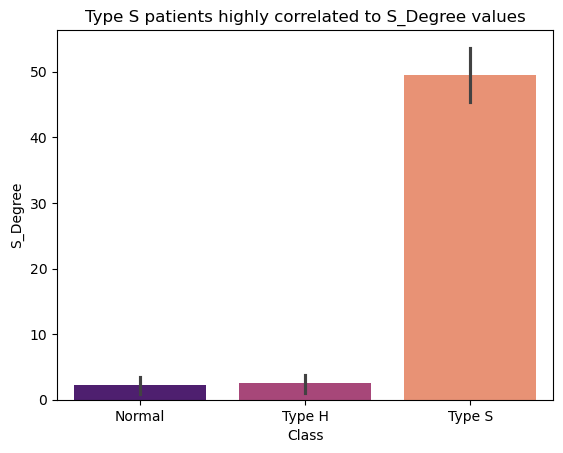

In [187]:
sns.barplot(x='Class', y='S_Degree', data=c1,palette ='magma');
plt.title('Type S patients highly correlated to S_Degree values');


Distribution Observed In Dataset Type: Mixed



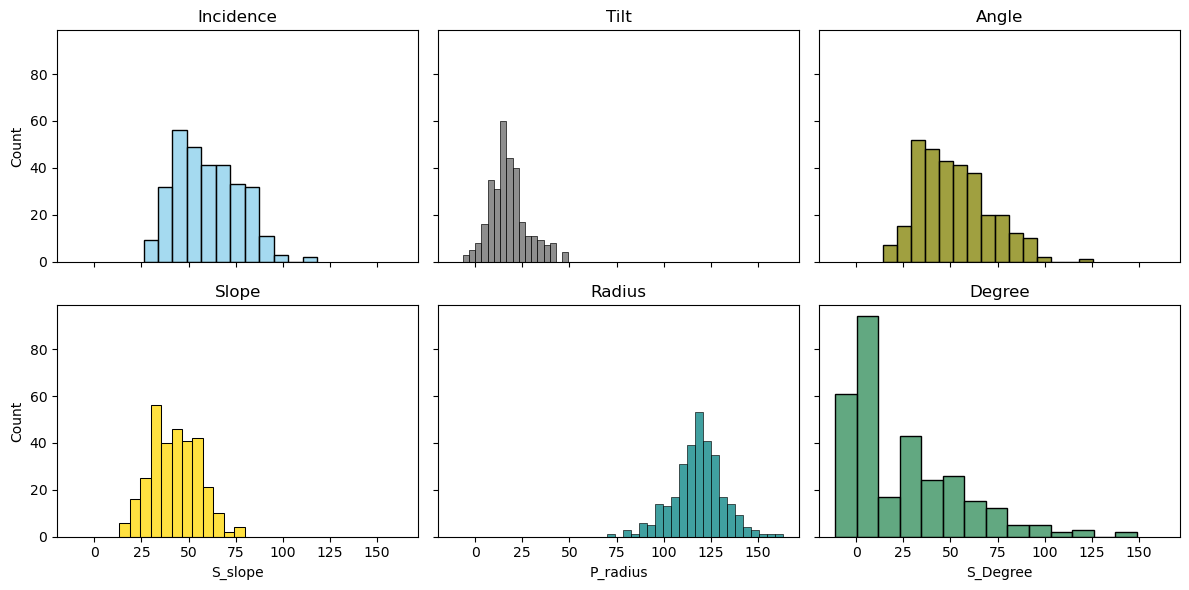

In [189]:
distribution(c1)

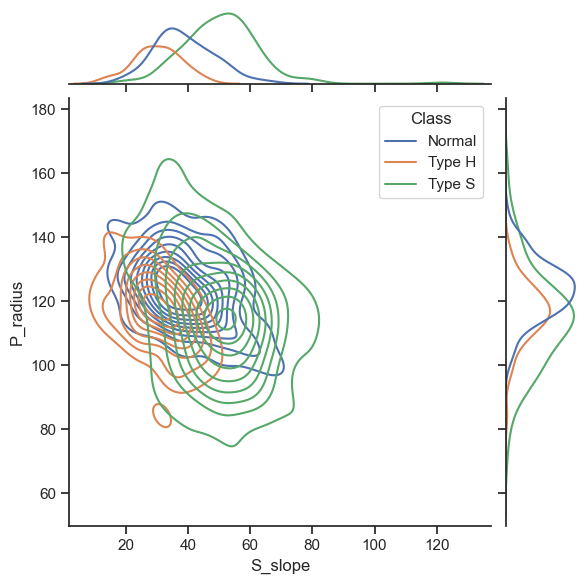

In [191]:
sns.set_theme(style="ticks")
sns.jointplot(data=c,x="S_slope", y="P_radius", hue="Class",kind="kde");

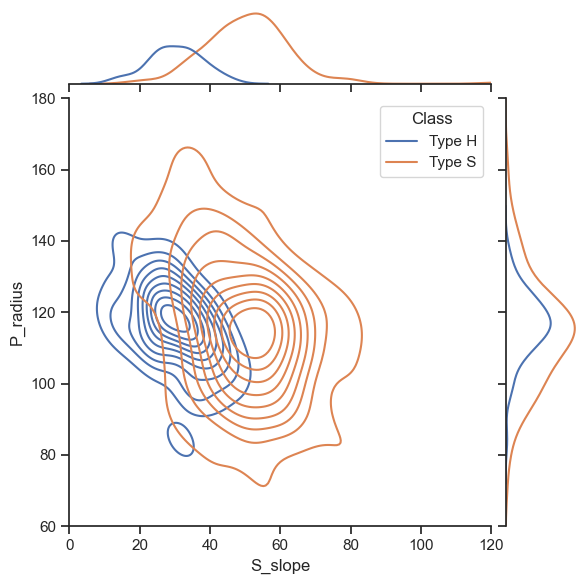

In [193]:
sns.set_theme(style="ticks")
plot=sns.jointplot(data=hs,x="S_slope", y="P_radius", hue="Class",kind="kde");
#setting equal magnitude of x and y to get a 1:1 scaled visualisation
plot.ax_marg_x.set_xlim(0, 120)
plot.ax_marg_y.set_ylim(60, 180);

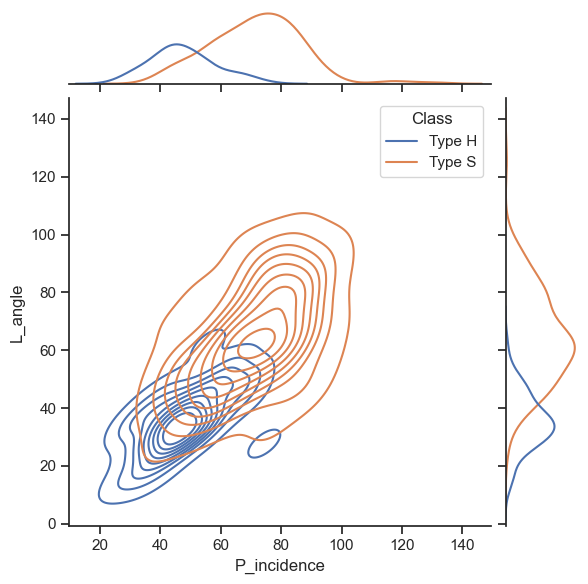

In [195]:
sns.jointplot(data=hs,x="P_incidence", y="L_angle", hue="Class",kind="kde");

(-40.0, 100.0)

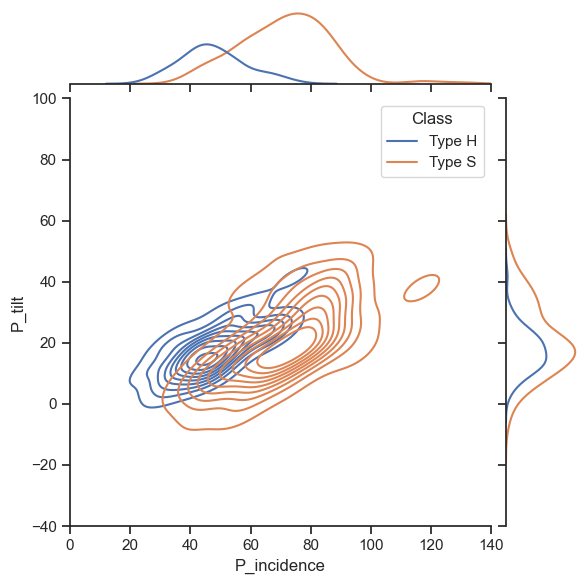

In [197]:
plot=sns.jointplot(data=hs,x="P_incidence", y="P_tilt", hue="Class",kind="kde");
#setting equal magnitude of x and y to get a 1:1 scaled visualisation
plot.ax_marg_x.set_xlim(0, 140);
plot.ax_marg_y.set_ylim(-40,100)

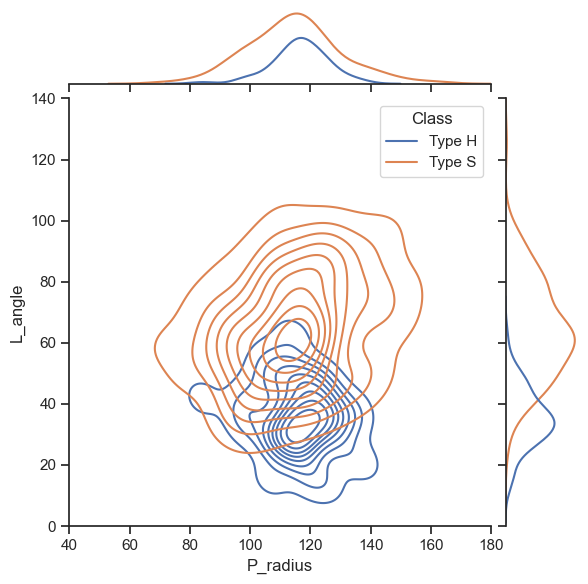

In [199]:
plot=sns.jointplot(data=hs,x="P_radius", y="L_angle", hue="Class",kind="kde");
#setting equal magnitude of x and y to get a 1:1 scaled visualisation
plot.ax_marg_x.set_xlim(40,180 )
plot.ax_marg_y.set_ylim(0, 140);


In [201]:
c1.corr()

ValueError: could not convert string to float: 'Normal'

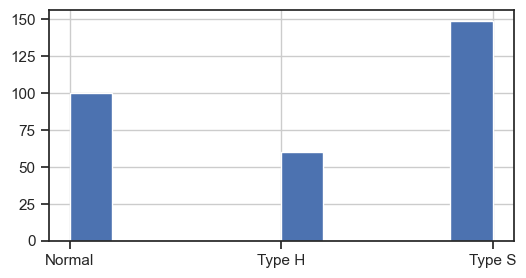

In [203]:
plt.figure(figsize=(6,3))
c1.Class.hist();

In [205]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(c1.drop(["Class"],axis = 1),),
        columns=['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius','S_Degree'])
y = c1.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [207]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(X_train, y_train,)

In [209]:
y_true, y_pred = y_test, knn_model.predict(X_test)
print('k-NN score for training set: %f' % knn_model.score(X_train, y_train))
print('k-NN score for test set: %f' % knn_model.score(X_test, y_test))
print(classification_report(y_true, y_pred))

k-NN score for training set: 0.927126
k-NN score for test set: 0.709677
              precision    recall  f1-score   support

      Normal       0.60      0.75      0.67        20
      Type H       0.36      0.33      0.35        12
      Type S       0.96      0.83      0.89        30

    accuracy                           0.71        62
   macro avg       0.64      0.64      0.64        62
weighted avg       0.73      0.71      0.71        62



In [211]:
# creating odd list of K for KNN
myList = list(range(3,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
              
# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


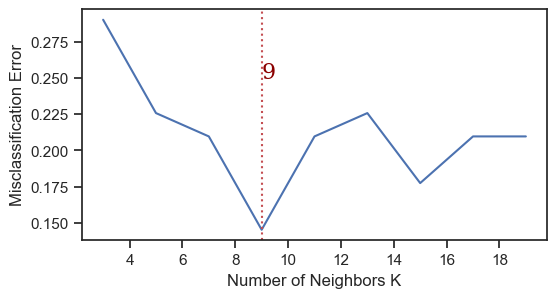

In [213]:
## plot misclassification error vs k
plt.figure(figsize=(6,3))
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.axvline(x=(optimal_k), color='r', linestyle='dotted');
plt.text(optimal_k,.25, optimal_k,fontdict=font );

In [215]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model = knn.fit(X_train, y_train,)
print('k-NN score for training set: %f' % knn_model.score(X_train, y_train))
print('k-NN score for test set: %f' % knn_model.score(X_test, y_test))
print(classification_report(y_true, y_pred))

k-NN score for training set: 0.821862
k-NN score for test set: 0.854839
              precision    recall  f1-score   support

      Normal       0.67      0.90      0.77        20
      Type H       0.57      0.33      0.42        12
      Type S       0.96      0.90      0.93        30

    accuracy                           0.79        62
   macro avg       0.73      0.71      0.71        62
weighted avg       0.79      0.79      0.78        62



In [217]:
oversample = SMOTE()
Xs_train,ys_train = oversample.fit_resample(X_train, y_train)

In [219]:
Xs_test,ys_test = oversample.fit_resample(X_test, y_test)

In [221]:
counter = Counter(ys_train)
print(counter)

Counter({'Type S': 119, 'Normal': 119, 'Type H': 119})


In [223]:
# creating odd list of K for KNN
myList = list(range(3,25))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xs_train, ys_train)
    # predict the response
    ys_pred = knn.predict(Xs_test)
    # evaluate accuracy
    scores = accuracy_score(ys_test, ys_pred)
    ac_scores.append(scores)
              
# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_ks = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_ks)

The optimal number of neighbors is 21


In [225]:
knn = KNeighborsClassifier(n_neighbors=optimal_ks)
smote_model=knn.fit(Xs_train, ys_train)

ys_true, ys_pred = ys_test, knn_model.predict(Xs_test)
print('k-NN score for training set: %f' % smote_model.score(Xs_train, ys_train))
print('k-NN score for test set: %f' % smote_model.score(Xs_test, ys_test))
print(classification_report(ys_true, ys_pred))

k-NN score for training set: 0.803922
k-NN score for test set: 0.755556
              precision    recall  f1-score   support

      Normal       0.62      0.93      0.75        30
      Type H       0.82      0.47      0.60        30
      Type S       0.96      0.90      0.93        30

    accuracy                           0.77        90
   macro avg       0.80      0.77      0.76        90
weighted avg       0.80      0.77      0.76        90



In [227]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8124801692226334
Best Parameters: {'n_neighbors': 5}


<Axes: >

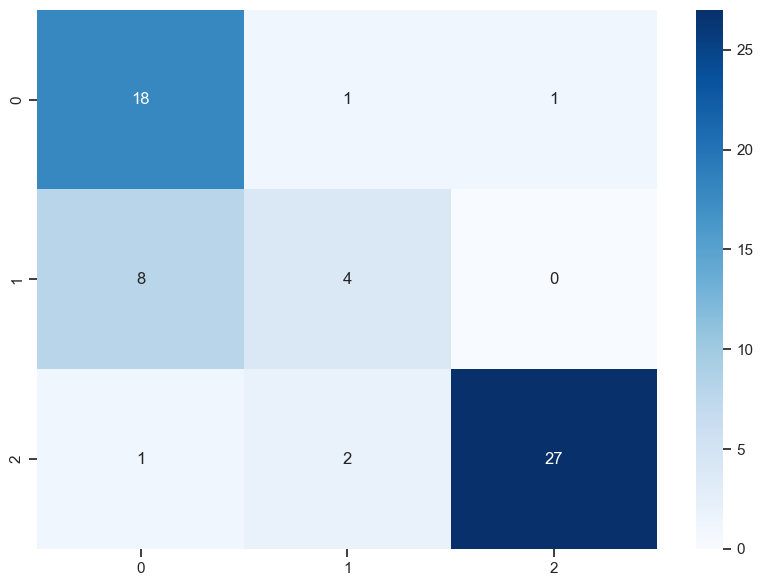

In [229]:
# Display confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')